In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as ctx #agregar mosaicos a los mapas
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

# Carga de datos

In [2]:
all_data = gpd.read_file(r'Data/Results/SDM_2010.shp')
variables_RCP2_6 = gpd.read_file(r'Data/Results/SDM_RCP2_6.shp')
variables_RCP8_5 = gpd.read_file(r'Data/Results/SDM_RCP8_5.shp')

In [3]:
all_data.columns

Index(['ET_ID', 'x', 'y', '%_H_1', '%_H_2', '%_H_3', '%_H_4', 'Bio_01_mea',
       'Bio_02_mea', 'Bio_03_mea', 'Bio_04_mea', 'Bio_05_mea', 'Bio_08_mea',
       'Bio_12_mea', 'Bio_15_mea', 'probabilid', 'geometry'],
      dtype='object')

In [4]:
variables_RCP2_6.columns

Index(['ET_ID', '%_H_1', '%_H_2', '%_H_3', '%_H_4', 'Bio_01_mea', 'Bio_02_mea',
       'Bio_03_mea', 'Bio_04_mea', 'Bio_05_mea', 'Bio_08_mea', 'Bio_12_mea',
       'Bio_15_mea', 'probabilid', 'geometry'],
      dtype='object')

In [5]:
variables_RCP8_5.columns

Index(['ET_ID', '%_H_1', '%_H_2', '%_H_3', '%_H_4', 'Bio_01_mea', 'Bio_02_mea',
       'Bio_03_mea', 'Bio_04_mea', 'Bio_05_mea', 'Bio_08_mea', 'Bio_12_mea',
       'Bio_15_mea', 'probabilid', 'geometry'],
      dtype='object')

In [6]:
all_data.rename(columns={"probabilid": "probabilidad_presencia"}, inplace=True)
all_data.columns

Index(['ET_ID', 'x', 'y', '%_H_1', '%_H_2', '%_H_3', '%_H_4', 'Bio_01_mea',
       'Bio_02_mea', 'Bio_03_mea', 'Bio_04_mea', 'Bio_05_mea', 'Bio_08_mea',
       'Bio_12_mea', 'Bio_15_mea', 'probabilidad_presencia', 'geometry'],
      dtype='object')

In [7]:
variables_RCP2_6.rename(columns={"probabilid": "probabilidad_presencia"}, inplace=True)
variables_RCP2_6.columns

Index(['ET_ID', '%_H_1', '%_H_2', '%_H_3', '%_H_4', 'Bio_01_mea', 'Bio_02_mea',
       'Bio_03_mea', 'Bio_04_mea', 'Bio_05_mea', 'Bio_08_mea', 'Bio_12_mea',
       'Bio_15_mea', 'probabilidad_presencia', 'geometry'],
      dtype='object')

In [8]:
variables_RCP8_5.rename(columns={"probabilid": "probabilidad_presencia"}, inplace=True)
variables_RCP8_5.columns

Index(['ET_ID', '%_H_1', '%_H_2', '%_H_3', '%_H_4', 'Bio_01_mea', 'Bio_02_mea',
       'Bio_03_mea', 'Bio_04_mea', 'Bio_05_mea', 'Bio_08_mea', 'Bio_12_mea',
       'Bio_15_mea', 'probabilidad_presencia', 'geometry'],
      dtype='object')

In [9]:
all_data[['ET_ID', 'probabilidad_presencia']]

,ET_ID,probabilidad_presencia
0,249,0.186100
1,280,0.060000
2,363,0.223412
3,412,0.356079
4,413,0.322302
...,...,...
3101,9369,0.150619
3102,9370,0.137493
3103,9371,0.129993
3104,9372,0.119755


In [10]:
variables_RCP2_6[['ET_ID', 'probabilidad_presencia']]

,ET_ID,probabilidad_presencia
0,249,0.181444
1,280,0.151895
2,363,0.254442
3,412,0.414769
4,413,0.382459
...,...,...
3101,9369,0.138760
3102,9370,0.173314
3103,9371,0.150493
3104,9372,0.136969


In [11]:
variables_RCP8_5[['ET_ID', 'probabilidad_presencia']]


,ET_ID,probabilidad_presencia
0,249,0.272873
1,280,0.171895
2,363,0.355308
3,412,0.449655
4,413,0.429295
...,...,...
3101,9369,0.135333
3102,9370,0.206321
3103,9371,0.126969
3104,9372,0.126969


## Umbralización

In [12]:
def umbralizacion(df):
    df['umbral'] = df['probabilidad_presencia'].apply(lambda x: 1 if x >= 0.60 else 0)
    return df['umbral'].value_counts(dropna=False)

In [13]:
umbralizacion(all_data)

umbral
0    1703
1    1403
Name: count, dtype: int64

In [14]:
umbralizacion(variables_RCP2_6)

umbral
0    1715
1    1391
Name: count, dtype: int64

In [15]:
umbralizacion(variables_RCP8_5)

umbral
0    1640
1    1466
Name: count, dtype: int64

## Diferencias entre escenarios

In [16]:
actual = all_data[['ET_ID', 'probabilidad_presencia', 'umbral']]
actual.rename(columns={"probabilidad_presencia": "P_actual","umbral": "U_actual", }, inplace=True)
actual.head(2)

C:\Users\molic\AppData\Local\Temp\ipykernel_14000\1682887826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual.rename(columns={"probabilidad_presencia": "P_actual","umbral": "U_actual", }, inplace=True)


,ET_ID,P_actual,U_actual
0,249,0.1861,0
1,280,0.0600,0


In [17]:
RCP2_6 = variables_RCP2_6[['ET_ID', 'probabilidad_presencia', 'umbral']]
RCP2_6.rename(columns={"probabilidad_presencia": "P_RCP2_6","umbral": "U_RCP2_6", }, inplace=True)
RCP2_6.head(2)

C:\Users\molic\AppData\Local\Temp\ipykernel_14000\3751346215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCP2_6.rename(columns={"probabilidad_presencia": "P_RCP2_6","umbral": "U_RCP2_6", }, inplace=True)


,ET_ID,P_RCP2_6,U_RCP2_6
0,249,0.181444,0
1,280,0.151895,0


In [18]:
RCP8_5 = variables_RCP8_5[['ET_ID', 'probabilidad_presencia', 'umbral', 'geometry']]
RCP8_5.rename(columns={"probabilidad_presencia": "P_RCP8_5","umbral": "U_RCP8_5", }, inplace=True)
RCP8_5.head(2)

C:\Users\molic\AppData\Local\Temp\ipykernel_14000\887231905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCP8_5.rename(columns={"probabilidad_presencia": "P_RCP8_5","umbral": "U_RCP8_5", }, inplace=True)


,ET_ID,P_RCP8_5,U_RCP8_5,geometry
0,249,0.272873,0,"POLYGON ((-2.18083 34.85145, -2.71695 34.77839..."
1,280,0.171895,0,"POLYGON ((14.68659 35.53849, 14.14122 35.56449..."


In [19]:
joindata = actual.merge(RCP2_6, on= 'ET_ID')
joindata.head(2)

,ET_ID,P_actual,U_actual,P_RCP2_6,U_RCP2_6
0,249,0.1861,0,0.181444,0
1,280,0.0600,0,0.151895,0


In [20]:
joindata = joindata.merge(RCP8_5, on= 'ET_ID')
joindata.head(2)

,ET_ID,P_actual,U_actual,P_RCP2_6,U_RCP2_6,P_RCP8_5,U_RCP8_5,geometry
0,249,0.1861,0,0.181444,0,0.272873,0,"POLYGON ((-2.18083 34.85145, -2.71695 34.77839..."
1,280,0.0600,0,0.151895,0,0.171895,0,"POLYGON ((14.68659 35.53849, 14.14122 35.56449..."


In [21]:
joindata['D_Actual_RCP2_6'] = joindata['P_RCP2_6'] - joindata['P_actual']
joindata.head(2)

,ET_ID,P_actual,U_actual,P_RCP2_6,U_RCP2_6,P_RCP8_5,U_RCP8_5,geometry,D_Actual_RCP2_6
0,249,0.1861,0,0.181444,0,0.272873,0,"POLYGON ((-2.18083 34.85145, -2.71695 34.77839...",-0.004656
1,280,0.0600,0,0.151895,0,0.171895,0,"POLYGON ((14.68659 35.53849, 14.14122 35.56449...",0.091895


In [22]:
joindata['D_Actual_RCP8_5'] = joindata['P_RCP8_5'] - joindata['P_actual']
joindata.head(2)

,ET_ID,P_actual,U_actual,P_RCP2_6,U_RCP2_6,P_RCP8_5,U_RCP8_5,geometry,D_Actual_RCP2_6,D_Actual_RCP8_5
0,249,0.1861,0,0.181444,0,0.272873,0,"POLYGON ((-2.18083 34.85145, -2.71695 34.77839...",-0.004656,0.086772
1,280,0.0600,0,0.151895,0,0.171895,0,"POLYGON ((14.68659 35.53849, 14.14122 35.56449...",0.091895,0.111895


In [23]:
# Asegúrate de que joindata sea un GeoDataFrame
joindata = gpd.GeoDataFrame(joindata, geometry='geometry')
#Exportar en shp
joindata.to_file('Data/Results/Diferencias_Output_SDM_sp1.shp')

C:\Users\molic\AppData\Local\Temp\ipykernel_14000\1544056671.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  joindata.to_file('Data/Results/Diferencias_Output_SDM_sp1.shp')
c:\Users\molic\anaconda3\envs\Bufonidae\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'D_Actual_RCP2_6' to 'D_Actual_R'
  ogr_write(
c:\Users\molic\anaconda3\envs\Bufonidae\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'D_Actual_RCP8_5' to 'D_Actual_1'
  ogr_write(


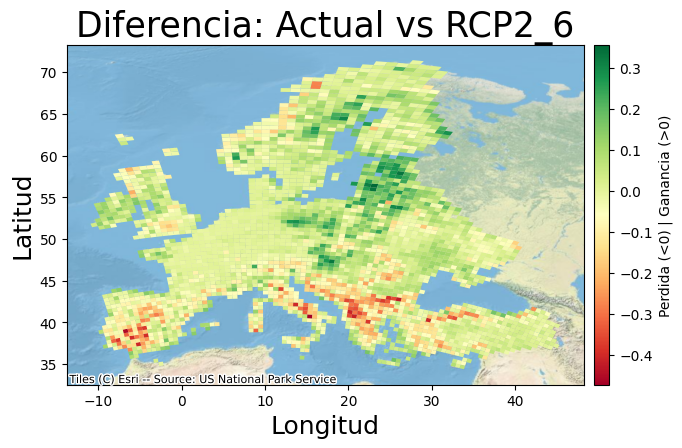

In [24]:
# Configurar el tamaño del mapa
fig, ax = plt.subplots(figsize=(7, 7))

ax.set_title('Diferencia: Actual vs RCP2_6', fontsize=25)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

# Plotear el GeoDataFrame con un gradiente de color según la riqueza de especies
joindata.plot(column='D_Actual_RCP2_6', ax=ax, legend=True, cax=cax,
              legend_kwds={'label': "Perdida (<0) | Ganancia (>0)", 'orientation': "vertical"},
              cmap='RdYlGn') #PiYG #RdYlGn

ctx.add_basemap(ax, crs=joindata.crs.to_string(), source=ctx.providers.Esri.WorldPhysical)
ax.set_xlabel('Longitud',fontsize=18)
ax.set_ylabel('Latitud',fontsize=18)

plt.show()


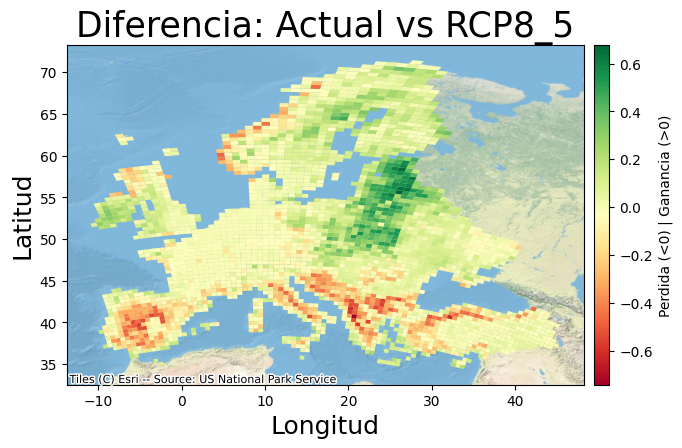

In [25]:
# Configurar el tamaño del mapa
fig, ax = plt.subplots(figsize=(7, 7))

ax.set_title('Diferencia: Actual vs RCP8_5', fontsize=25) 

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

# Plotear el GeoDataFrame con un gradiente de color según la riqueza de especies
joindata.plot(column='D_Actual_RCP8_5', ax=ax, legend=True, cax=cax,
              legend_kwds={'label': "Perdida (<0) | Ganancia (>0)", 'orientation': "vertical"},
              cmap='RdYlGn') #PiYG #RdYlGn

ctx.add_basemap(ax, crs=joindata.crs.to_string(), source=ctx.providers.Esri.WorldPhysical)
ax.set_xlabel('Longitud',fontsize=18)
ax.set_ylabel('Latitud',fontsize=18)

plt.show()